# Two-armed Bernoulli Bandits

*Andrea Mazzolini, amazzoli@ictp.it*

<br/><br/>

See the pdf file in the folder for more details (by *Alberto Pezzotta*).

In brief, an agent has to pull one of the two arms of a bandit (slot-machine) $a\in \lbrace 1,2 \rbrace$. Both the arms provide a Bernoulli-distributed reward: $r = 1$ with probability $q_i$, $r = 0$ with $1-q_i$, where $i \in \lbrace 1,2 \rbrace$.
The agent doesn't know the two probabilities, so he has to try at random the two arms at first, *exploration*, and then, as soon he has a "reliable" knowledge of which arm is the best one, *exploit* it.

In the following we provide a **dynamic-programming algorithm** which, under few assumption, provide the best strategy to adopt in this exploration-exploitation dilemma.

## MDP in hyper-parameter space of the belief

We assume that our beleif on the winning probability $q_i$ of each arm $i$ is a Beta distribution $\text{Beta}(q_i | \alpha^i, \beta^i)$.
Moreover, we consider the two arms to be independent. 
This distribution contains our current knowledge about the problem and we want to use it at the best that we can.
The result of the algorithm provides us a rule to take the best decision, i.e. pull the right or the left arm, given our belief, in order to optimize a given utility function (the exponentially discounted return shown later).

The Bayes' rule for the beleif update translates into the following one for the hyper-parameters (see the pdf notes..):

$$
    \begin{aligned}
        (\alpha^1,\,\beta^1,\,\alpha^2,\,\beta^2) \mapsto 
            & \mathbb{I}(a_t=1)\,\Big[ \mathbb{I}(r_{t+1}=1)\,\big( \alpha^1+1,\,\beta^1,\,\alpha^2,\,\beta^2\big) + \mathbb{I}(r_{t+1}=0)\,\big( \alpha^1,\,\beta^1+1,\,\alpha^2,\,\beta^2\big) \Big] \\
            + & \mathbb{I}(a_t=2)\,\Big[ \mathbb{I}(r_{t+1}=1)\,\big( \alpha^1,\,\beta^1,\,\alpha^2+1,\,\beta^2\big) + \mathbb{I}(r_{t+1}=0)\,\big( \alpha^1,\,\beta^1,\,\alpha^2,\,\beta^2+1\big) \Big] \\
    \end{aligned}
$$

where $\mathbb{I}(x)$ is the indicator function, which is one if the condition $x$ is true, $0$ if false.

Choosing an uniform initial prior, the corresponding hyperparameters are $\alpha^i_0 = \beta^i_0 = 1$.
By combining this assumption and the update rule above, one finds that the hyperparameters at time $t$ can be rewritten in terms of the number of wins, $n_i$, and losses, $m_i$:
$$
    \alpha^i_t = n_i + 1 \quad \mbox{and} \quad \beta^i_t = m_i + 1 \ .
$$

This observation can be used to cast the Partially Observable bandit problem into a standard MDP, where the state space is defined by the hyperparameters of the beliefs: $s_t = (n_1,m_1,n_2,m_2)$.
Specifically, the transition to new states are given by the following rule:
$$
    s_{t+1} = \left\{
    \begin{array}{cl}
        (n_1+1,\,m_1,\,n_2,\,m_2)  & \qquad \mbox{w.p. } \ p(s_{t+1}| a_t=1, s_t) = \dfrac{n_1+1}{n_1+m_1+2} \\[2ex]
        (n_1,\,m_1+1,\,n_2,\,m_2)  & \qquad \mbox{w.p. } \ p(s_{t+1}| a_t=1, s_t) = \dfrac{m_1+1}{n_1+m_1+2} \\[2ex]
        (n_1,\,m_1,\,n_2+1,\,m_2)  & \qquad \mbox{w.p. } \  p(s_{t+1}| a_t=2, s_t) = \dfrac{n_2+1}{n_2+m_2+2} \\[2ex]
        (n_1,\,m_1,\,n_2,\,m_2+1)  & \qquad \mbox{w.p. } \  p(s_{t+1}| a_t=2, s_t) = \dfrac{m_2+1}{n_2+m_2+2} \\[2ex]
    \end{array}
    \right.
$$
In words, the game moves from a given configuration of counters to a new one according to a transition probability which is my best guess of winning or loosing (determined by my belief).
Note that this probability is also affected by the initial prior. Its derivation is shown in the pdf notes.

The reward can be expressed as a function of $s_t$ and s$_{t+1}$. It reflects the fact that the agent gets $r=1$ only if a counter associated to a winning event increases:
$$
    r_t = r(s_{t+1}, s_t) = \mathbb{I}\big(s_{t+1} = s_t\big|_{n_1 \mapsto n_1 + 1}\big) + \mathbb{I}\big(s_{t+1} = s_t\big|_{n_2 \mapsto n_2 + 1}\big)
$$

States, actions, transition probabilities and rewards described above define a Markov Decision Process which can now be solved through the Bellman optimality equation.

The goal of the agent is then to find the policy $\pi(a)$ (probability of choosing one of the two arms) that maximizes an exponentially discounted return:
$$
    V_\pi(s) = \mathbb{E}_\pi\bigg[ \sum_{t=0}^\infty \gamma^t\,r_t \Big| s_0 = s \bigg] \ .
$$
which considers the summation of all the rewards that I will take form the present time to the future (in a game played infinitely many times) discounted by a factor $\gamma \in [0,1)$ which exponetially suppresses the importance that I give to future rewards.
The discount factor can be equivalently interpreted as the continuing probability of the game. In this latter interpretation the players wants to maximise the non-discounted rewards over the finite number of episodes that they will play.

The optimality equation provides a way to compute the best return that I can expect from a given state $V^*(s)$ as follows:

$$
V^*(s) = \max_{a\in\{1,2\}} \sum_{s'} p(s'|s,a)\big[ r(s',s) + \gamma\,V^*(s') \big]
$$

It also gives the best action that can be taken (the best policy is deterministic):
$$
    a^*(s_t) = {\rm argmax}_{a\in\{1,2\}} Q^*(s_t,a)
$$
where $Q^*$ is the optimal quality function
$$
    Q^*(s,a) = \sum_{s'} p(s'|s,a)\big[ r(s',s) + \gamma\,V^*(s') \big]
$$

In conclusion, $a^*(s)$ says which is the best arm to pull to optimize the discounted return, by having a current beleife described by $s = (n_1,m_1,n_2,m_2)$.

## The state space of the hyperparameters is infinite!

Before presenting the algorithm to solve the Belmann equation it is important to note that a state is defined by the value of each hyperparameter, which is an integer going from $0$ to $\infty$.
This clearly does not allow for a direct implementation of standard algorithms for tabular MDPs such as dynamic programming (the one considered here).

To find an approximate MDP with a finite state space we can note that the discount factor $\gamma$ (which appears in the exponentially discounted return) introduces a time scale, since one can interpret it as the probability of continuing the game after each step.
In particular the quantity $1/(1-\gamma)$, i.e. the **time horizon**, is the number of time steps that the player expects to play (on average).
Therefore, it is very unlikely that the game can last for a time much greater than the time horizon. 

In order to find a more quantitative rule to fix the boundary of the state space, one can consider the probability that the game lasts for more that $T$ steps: $P(t>T) = \gamma^T$.
If $T$ is chosen such that this probability is small: $P(t>T) = \epsilon$, one finds:

$$
T = \log{\epsilon} \; / \; \log{\gamma}
$$

If we define se sub set of states:

$$
S(t) = \lbrace  s = (n_1,m_1,n_2,m_2) \;\; \text{such that} \;\; n_1 +m_1 + n_2 + m_2 = t \rbrace 
$$

A good approximation of the state space is to consider $\mathcal{S} = \bigcup_{t<T} S(t)$, since the summation of the four counters increases of $1$ at each step.

## Finding the optimal strategy using the backward propagation of the values

A very efficient dyniamic programming algorithm that can be applied in this case exploits the following property of the Bellman equation:

$$
V^*(s) |_{s\in S(t)} = \max_{a\in\{1,2\}} \sum_{s' \in S(t+1)} p(s'|s,a)\big[ r(s',s) + \gamma\,V^*(s') \big] = B(V^*(s))|_{s\in S(t+1)} 
$$

which basically says that to compute the values of a state in $S(t)$ one needs to know only the values of the states in $S(t+1)$. This comes from the fact that a transition from a state whose sum of counters is $t$ leads always to a state in which only one of the counters is increased by one unit, and therefore belongs to $S(t+1)$.

As a consequence if one knows the values at $S(T)$ (the boundary of the approximated state space) all the other values can be iteratively computed going backward.

This can seem useless since we do not know those values at the boundary.
However, if one tries to estimate them, and "backpropagate" this estimate, one realizes that the error of such estimates will be negligible far away from the boundary.
Indeed, looking at the optimality equation in its eyes, one can see that the order of this error for the values of $S(t)$ is $\gamma^{T-t}$.

## Implementing backward recursion of the value

In [18]:
import numpy as np
import matplotlib.pyplot as plt

eps = 1/10000 # Precision of the approximation
gamma = 0.9 # Discount factor

T = int( np.log(eps) / np.log(gamma) )
print("Temporal steps after which the probability of continuing the game is {}: {}".format(eps, T))

Temporal steps after which the probability of continuing the game is 0.0001: 87


It is useful to introduce a way to enumerate all states $S(t)$:

In [19]:
def enumerate_state_at_time(time):
    states = []
    for n1 in range(time+1):
        for m1 in range(time-n1+1):
            for n2 in range(time-n1-m1+1):
                m2 = time - n1 - m1 - n2
                states.append((n1, m1, m2, n2))
    return states

enumerate_state_at_time(5)

[(0, 0, 5, 0),
 (0, 0, 4, 1),
 (0, 0, 3, 2),
 (0, 0, 2, 3),
 (0, 0, 1, 4),
 (0, 0, 0, 5),
 (0, 1, 4, 0),
 (0, 1, 3, 1),
 (0, 1, 2, 2),
 (0, 1, 1, 3),
 (0, 1, 0, 4),
 (0, 2, 3, 0),
 (0, 2, 2, 1),
 (0, 2, 1, 2),
 (0, 2, 0, 3),
 (0, 3, 2, 0),
 (0, 3, 1, 1),
 (0, 3, 0, 2),
 (0, 4, 1, 0),
 (0, 4, 0, 1),
 (0, 5, 0, 0),
 (1, 0, 4, 0),
 (1, 0, 3, 1),
 (1, 0, 2, 2),
 (1, 0, 1, 3),
 (1, 0, 0, 4),
 (1, 1, 3, 0),
 (1, 1, 2, 1),
 (1, 1, 1, 2),
 (1, 1, 0, 3),
 (1, 2, 2, 0),
 (1, 2, 1, 1),
 (1, 2, 0, 2),
 (1, 3, 1, 0),
 (1, 3, 0, 1),
 (1, 4, 0, 0),
 (2, 0, 3, 0),
 (2, 0, 2, 1),
 (2, 0, 1, 2),
 (2, 0, 0, 3),
 (2, 1, 2, 0),
 (2, 1, 1, 1),
 (2, 1, 0, 2),
 (2, 2, 1, 0),
 (2, 2, 0, 1),
 (2, 3, 0, 0),
 (3, 0, 2, 0),
 (3, 0, 1, 1),
 (3, 0, 0, 2),
 (3, 1, 1, 0),
 (3, 1, 0, 1),
 (3, 2, 0, 0),
 (4, 0, 1, 0),
 (4, 0, 0, 1),
 (4, 1, 0, 0),
 (5, 0, 0, 0)]

Then, we need to choose how to estimate the value of the states at the boundary, i.e. $S(T)$.
A reasonable choice can be to consider the maximum between the average reward of the two arms: $\max_i \{ q_i = (n_i+1)/(n_i+m_i+2)\}$, which basically is the value computed at $\gamma=0$ (without looking at the future).

In [20]:
values = dict() # The value is a dictionary (n1,m1,n2,m2) -> value
best_actions = dict() # This is a dictionary (n1,m1,n2,m2) -> {1,2}

# Initializing all the values at the boundary
for boundary_state in enumerate_state_at_time(T):
    q1 = (boundary_state[0] + 1) / (boundary_state[0] + boundary_state[1] + 2)
    q2 = (boundary_state[2] + 1) / (boundary_state[2] + boundary_state[3] + 2)
    values[boundary_state] = max(q1, q2)
    best_actions[boundary_state] = np.argmax((q1,q2))+1

The next step is to iteratively propagate the values from the states $S(t+1)$ to $S(t)$ using directly the Bellman equation.

In [21]:
# This computes the values of a "state" in S(t) by knowing the "values" of the states in S(t+1)
def compute_value(state, values):
    p1_win = (state[0] + 1) / (state[0] + state[1] + 2)
    p2_win = (state[2] + 1) / (state[2] + state[3] + 2)
    quality1 = p1_win * (1 + gamma * values[(state[0]+1, state[1], state[2], state[3])]) + \
                (1-p1_win) * gamma * values[(state[0], state[1]+1, state[2], state[3])]
    quality2 = p2_win * (1 + gamma * values[(state[0], state[1], state[2]+1, state[3])]) + \
                (1-p2_win) * gamma * values[(state[0], state[1], state[2], state[3]+1)]
    return max(quality1, quality2), np.argmax((quality1, quality2))+1

# From the boundary S(T) going backward..
for t in range(T)[::-1]:

    # ..get S(t)..
    states = enumerate_state_at_time(t)

    # ..for all s in S(t) compute the value and the best action
    for state in states:
        val, best_a = compute_value(state, values)
        values[(state)] = val
        best_actions[(state)] = best_a

## Plotting the solution

In [22]:
n2, m2 = (5,5)

# Building a matrix of values and best actions masked outside the domain
values_mat = -np.ones((T+1, T+1))
best_a_mat = -np.ones((T+1, T+1))
for n in range(T):
    for m in range(T):
        if n+m+n2+m2 <= T:
            values_mat[n,m] = values[(n,m,n2,m2)]
            best_a_mat[n,m] = best_actions[(n,m,n2,m2)]
values_mat = np.ma.masked_where(values_mat==-1, values_mat)
best_a_mat = np.ma.masked_where(values_mat==-1, best_a_mat)

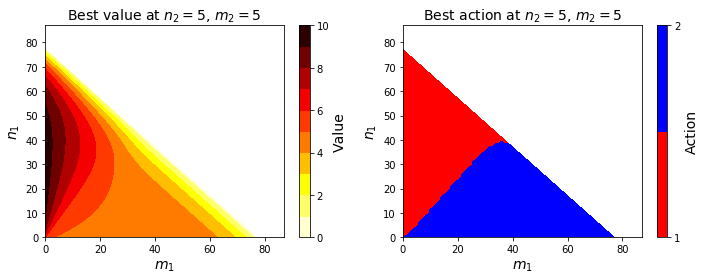

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

ax1.set_title('Best value at $n_2=${}, $m_2=${}'.format(n2,m2), fontsize=14)
ax1.set_xlabel('$m_1$', fontsize=14)
ax1.set_ylabel('$n_1$', fontsize=14)
im = ax1.contourf(values_mat, cmap='hot_r', levels=10)
bar = fig.colorbar(im, ax=ax1)
bar.set_label('Value', fontsize=14)

ax2.set_title('Best action at $n_2=${}, $m_2=${}'.format(n2,m2), fontsize=14)
ax2.set_xlabel('$m_1$', fontsize=14)
ax2.set_ylabel('$n_1$', fontsize=14)
cs = ax2.contourf(best_a_mat, levels=1, colors=['r','b'])
bar = fig.colorbar(cs, ax=ax2)
bar.set_label('Action', fontsize=14)
bar.set_ticks([1,2])

plt.tight_layout()
#plt.savefig('plot_{}.png'.format(gamma), dpi=200)